In [1]:
import numpy as np
import matplotlib
import math
import random
import matplotlib.pyplot as plt
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split

In [2]:
data = np.random.randn(500, 2) ## Column one=X values; Column two=Y values
theta = np.zeros(2) ## Model Parameters(Weights)

# ***Loss Function and gradients computing***

In [3]:
def loss_function(data,theta):
    #get m and b
    m = theta[0]
    b = theta[1]
    loss = 0
    #on each data point
    for i in range(0, len(data)):
        #get x and y
        x = data[i, 0]
        y = data[i, 1]
        #predict the value of y
        y_hat = (m*x + b)
        #compute loss as given in quation (2)
        loss = loss + ((y - (y_hat)) ** 2)
    #mean sqaured loss
    mean_squared_loss = loss / float(len(data))
    return mean_squared_loss

#Calculate the Gradient of loss function for model parameters

def compute_gradients(data, theta):
    gradients = np.zeros(2)
    #total number of data points
    N = float(len(data))
    m = theta[0]
    b = theta[1]
    #for each data point
    for i in range(len(data)):
        x = data[i, 0]
        y = data[i, 1]
        #gradient of loss function with respect to m as given in (3)
        gradients[0] += - (2 / N) * x * (y - (( m* x) + b))
        #gradient of loss funcction with respect to b as given in (4)
        gradients[1] += - (2 / N) * (y - ((theta[0] * x) + b))
    #add epsilon to avoid division by zero error
    epsilon = 1e-6 
    gradients = np.divide(gradients, N + epsilon)
    return gradients

# ***Batch Gradient Descent***

In [4]:
theta = np.zeros(2)
gr_loss=[]
for t in range(50000):
    #compute gradients
    gradients = compute_gradients(data, theta)
    #update parameter
    theta = theta - (1e-2*gradients)
    #store the loss
    gr_loss.append(loss_function(data,theta))

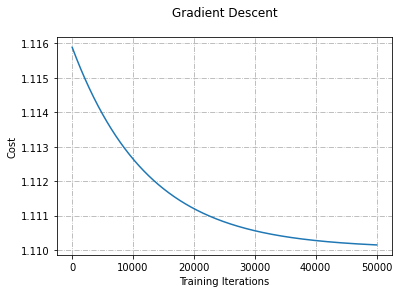

In [5]:
plt.plot(gr_loss)
plt.grid(linestyle='-.')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent\n')
plt.show()

# ***Minibatch Gradient Descent***

In [6]:
def minibatch(data, theta, lr = 5e-3, minibatch_ratio = 0.005, num_iterations = 5000):
    
    loss = []
    minibatch_size = int(math.ceil(len(data) * minibatch_ratio))
    print('Minibatch size: ', minibatch_size)
    if minibatch_size == 1:
        print('SGD')
    
    for t in range(num_iterations):
        sample_size = random.sample(range(len(data)), minibatch_size)
        np.random.shuffle(data)
        
        #sample batch of data
        sample_data = data[0:sample_size[0], :]
        
        #compute gradients
        grad = compute_gradients(sample_data, theta)
       
        #update parameters
        theta = theta - (lr * grad)
        
        loss.append(loss_function(data,theta))
            
    return loss

In [7]:
theta = np.zeros(2)
mini_loss = minibatch(data, theta)

Minibatch size:  3


In [8]:
len(gr_loss),len(mini_loss)

(50000, 5000)

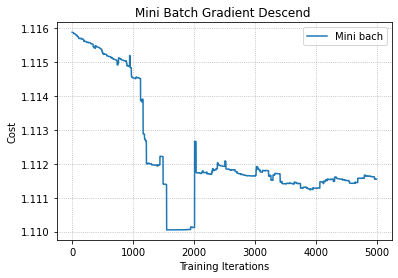

In [9]:
plt.plot(mini_loss,label='Mini bach')
plt.grid(linestyle=':')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
plt.legend()
plt.title('Mini Batch Gradient Descend ')
plt.show()

# ***RProp***

In [10]:
def RProp(data, theta, lr = 1e-2, num_iterations = 5000):

    loss = []
    gradient_update = np.zeros(2)
    #initialize gradients_sum for storing sum of gradients
    gradients_sum = np.zeros(theta.shape[0])

    for t in range(num_iterations):
        
        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)
    
        #update gradients
        if gradients[0]>0 and gradients[1]>0:
            gradient_update = np.ones(2)
        elif gradients[0]<0 and gradients[1]>0:
            gradient_update = np.array([-1, 1])
        elif gradients[0]>0 and gradients[1]<0:
            gradient_update = np.array([1, -1])
        else: gradient_update = np.array([-1, -1])
    
        #update model parameter according to equation (12)
        theta = theta - (lr * gradient_update)

        loss.append(loss_function(data,theta))

    return loss

Text(0, 0.5, 'Cost')

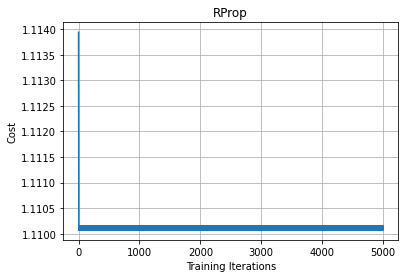

In [11]:
theta = np.zeros(2)
rprop_loss = RProp(data, theta) 

plt.plot(rprop_loss)
plt.grid()
plt.title('RProp')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

# ***Momentum***

In [12]:
def Momentum(data, theta, lr = 1e-2, gamma = 0.9, num_iterations = 5000):
    
    loss = []
    
    #Initialize vt with zeros:
    vt = np.zeros(theta.shape[0])
    
    
    for t in range(num_iterations):
        
        #compute gradients with respect to theta 
        gradients = compute_gradients(data, theta)
        
        #Update vt by equation (8)
        vt = gamma * vt + lr * gradients
        
        #update model parameter theta by equation (9)
        theta = theta - vt
    
        #store loss of every iteration
        loss.append(loss_function(data,theta))
        
    return loss

In [13]:
theta = np.zeros(2)
mom_loss = Momentum(data, theta)

In [14]:
theta = np.zeros(2)
mom_loss = Momentum(data, theta)

Text(0.5, 1.0, 'Momentum')

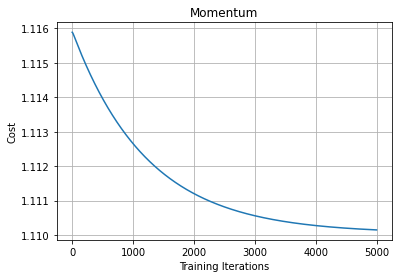

In [15]:
plt.plot(mom_loss)
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

plt.title('Momentum')

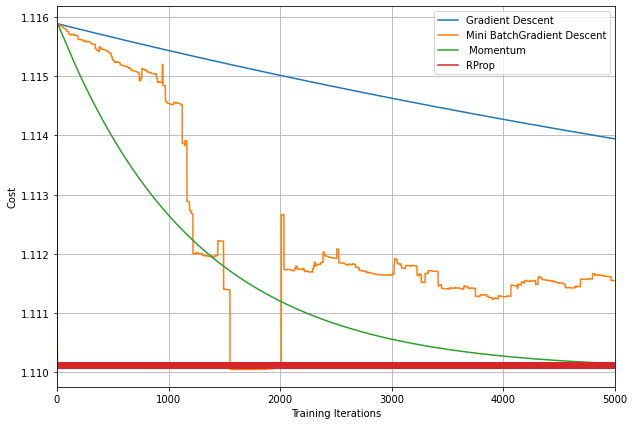

In [16]:
plt.figure(figsize=(10,7))

plt.plot(gr_loss,label='Gradient Descent')
plt.plot(mini_loss,label='Mini BatchGradient Descent')
plt.plot(mom_loss,label=' Momentum')
plt.plot(rprop_loss,label='RProp')

plt.xlim(0,5000)
plt.grid()
plt.legend()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

plt.show()

# ***AdaGrad***

In [17]:
def AdaGrad(data, theta, lr = 1e-2, epsilon = 1e-8, num_iterations = 100):

    loss = []
    
    #initialize gradients_sum for storing sum of gradients
    gradients_sum = np.zeros(theta.shape[0])

    for t in range(num_iterations):
        
        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)
    
        #compute square of sum of gradients
        gradients_sum += gradients ** 2
    
        #update gradients
        gradient_update = gradients / (np.sqrt(gradients_sum + epsilon))
    
        #update model parameter according to equation (12)
        theta = theta - (lr * gradient_update)

        loss.append(loss_function(data,theta))

    return loss

In [18]:
theta = np.zeros(2)
adagrad_loss = AdaGrad(data, theta)

Text(0, 0.5, 'Cost')

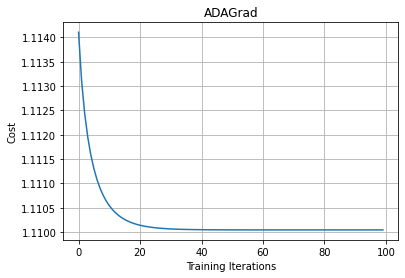

In [19]:
plt.plot(adagrad_loss)
plt.grid()
plt.title('ADAGrad')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

# ***Adam***

In [20]:
def Adam(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.9, epsilon = 1e-6, num_iterations = 1000):
   
    loss = []
    
    #initialize first moment mt
    mt = np.zeros(theta.shape[0])
    
    #initialize second moment vt
    vt = np.zeros(theta.shape[0])
    
    for t in range(num_iterations):
        
        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)
        
        #update first moment mt as given in equation (19)
        mt = beta1 * mt + (1. - beta1) * gradients
        
        #update second moment vt as given in equation (20)
        vt = beta2 * vt + (1. - beta2) * gradients ** 2
        
        #compute bias-corected estimate of mt (21)
        mt_hat = mt / (1. - beta1 ** (t+1))
        
        #compute bias-corrected estimate of vt (22)
        vt_hat = vt / (1. - beta2 ** (t+1))
        
        #update the model parameter as given in (23)
        theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat
      
        loss.append(loss_function(data,theta))

    return loss

Text(0, 0.5, 'Cost')

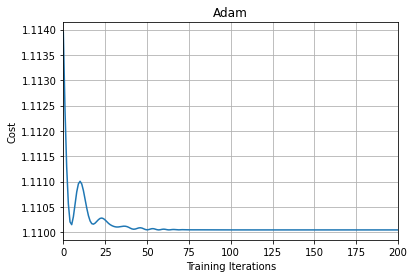

In [21]:
theta = np.zeros(2)
adam_loss = Adam(data, theta) 

plt.plot(adam_loss)
plt.grid()
plt.xlim(0,200)
plt.title('Adam')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

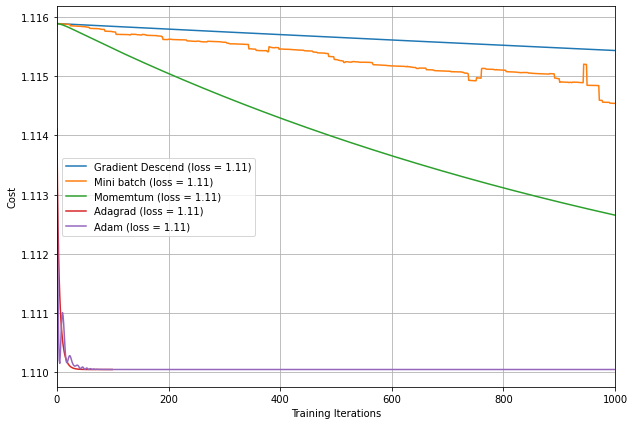

In [22]:
plt.figure(figsize=(10,7))
plt.plot(gr_loss,label='Gradient Descend (loss = %0.2f)' % (gr_loss[-1]))
plt.plot(mini_loss,label='Mini batch (loss = %0.2f)' % (mini_loss[-1]))

plt.plot(mom_loss,label='Momemtum (loss = %0.2f)' % (mom_loss[-1]))

plt.plot(adagrad_loss,label='Adagrad (loss = %0.2f)' % (adagrad_loss[-1]))
plt.plot(adam_loss,label='Adam (loss = %0.2f)' % (adam_loss[-1]))

plt.xlim(0,1000)
plt.grid()
plt.legend()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

plt.show()